In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

#to plot graphs in notebook
%matplotlib inline


In [5]:
clinical1 = pd.read_csv("clinical1.csv")
clinical1.head()
#clinical_test = pd.read_csv("clinical2.csv")
#clinical_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [6]:
print(clinical1.shape,'-',clinical2.shape)

NameError: name 'clinical2' is not defined

In [7]:
clinical1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [8]:
clinical1.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [9]:
clinical1.work_type.unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [10]:
clinical1.Residence_type.unique()

array(['Rural', 'Urban'], dtype=object)

In [11]:
clinical1.smoking_status.unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [12]:
print(clinical1.smoking_status.count())
print(clinical1.count())
print(type(clinical1['smoking_status']))
print('--')
clinical1['smoking_status'].fillna(clinical1.smoking_status.mode()[0], inplace=True)
print(clinical1.smoking_status.count())
print(clinical1.smoking_status.unique())

30108
id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64
<class 'pandas.core.series.Series'>
--
43400
['never smoked' 'formerly smoked' 'smokes']


In [27]:
clinical1.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [52]:
#clinical1.gender.isna().sum()
clinical1.isnull().any()
#43400

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [13]:
print(clinical1.bmi.mode())
print(clinical1.bmi.count())
#clinical1.bmi.fillna(clinical1.bmi.mode(), inplace=True)
clinical1.bmi.fillna(27.7, inplace=True)
#clinical1.bmi.replace(np.nan, clinical1.bmi.mode(), inplace=True)
print(clinical1.bmi.count())
print(clinical1.bmi.unique())


0    27.7
dtype: float64
41938
43400
[18.  39.2 17.6 35.9 19.1 50.1 17.7 27.  32.3 54.6 35.  22.  39.4 26.1
 42.4 33.  19.7 22.5 24.6 25.2 41.8 60.9 31.5 27.3 23.7 24.5 28.4 26.9
 26.7 31.2 25.  25.4 27.5 16.  31.6 25.1 30.9 24.8 23.4 29.4 18.3 20.
 19.5 36.  27.7 28.5 26.8 33.6 29.1 34.9 35.3 26.4 40.1 43.1 36.7 29.3
 21.2 36.6 21.4 27.9 34.3 31.  38.7 27.6 16.5 22.8 35.4 24.3 25.7 21.9
 38.4 30.5 25.9 54.7 29.9 18.6 27.1 24.9 19.4 29.  48.2 34.6 25.8 27.2
 20.7 30.  37.3 34.1 23.6 39.5 23.5 23.3 64.8 28.1 24.4 29.8 35.1 43.6
 21.  47.3 16.6 37.5 24.2 21.6 31.1 15.5 20.5 35.6 16.7 41.9 16.4 17.1
 29.2 37.9 32.5 44.6 33.2 22.3 39.6 37.8 40.3 41.5 41.6 23.8 39.  23.2
 18.9 36.1 36.3 40.5 46.5 16.8 46.6 26.2 35.2 20.9 36.8 34.4 22.2 13.8
 31.7 34.2 36.9 31.9 31.8 29.5 28.8 28.9 15.3 37.1 38.2 30.2 45.2 21.8
 17.  49.8 27.8 60.2 27.4 22.9 26.6 23.  32.6 22.1 25.5 31.4 26.  21.7
 29.7 44.3 51.  39.7 34.7 21.3 23.9 41.2 30.7 34.8 19.2 24.  35.7 35.8
 40.8 24.7 45.  28.3 19.  32.4 34.  28.7 

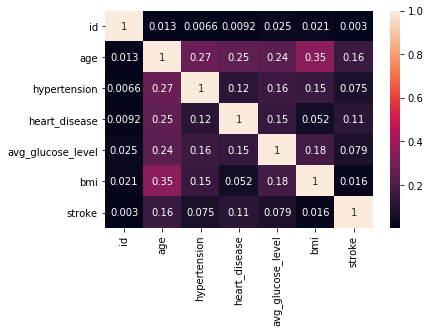

In [14]:
sns.heatmap(clinical1.corr(),annot=True)

In [15]:
#plt.hist(clinical1.heart_disease)
#clinical1.groupby("heart_disease").count()
clinical1.groupby("stroke").count()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,42617,42617,42617,42617,42617,42617,42617,42617,42617,42617,42617
1,783,783,783,783,783,783,783,783,783,783,783


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


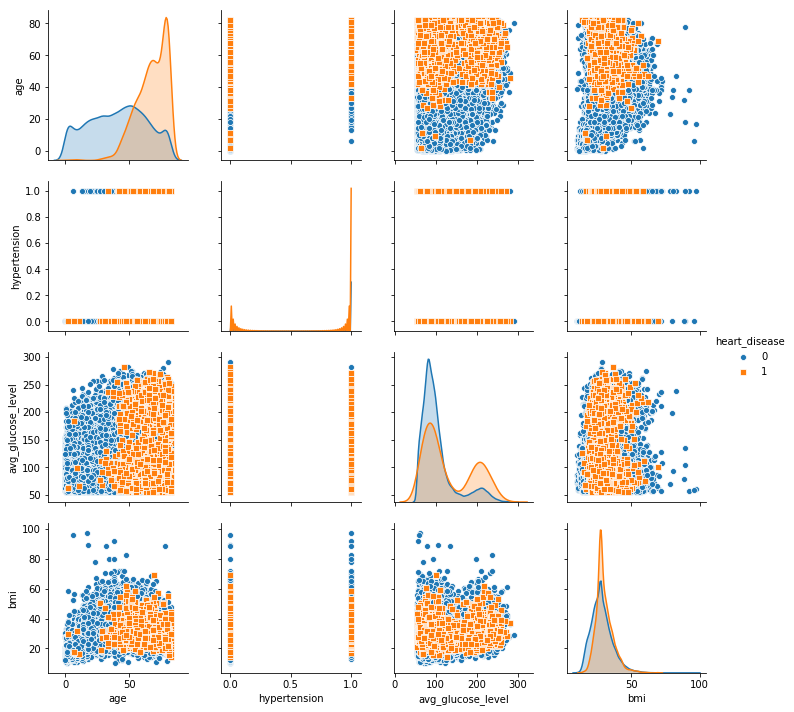

In [16]:
#pair plot for heart disease
#sns.pairplot(clinical1[['age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status']], vars=['age','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi', 'smoking_status'],hue="hypertension",dropna=True, markers=["o","s"])

sns.pairplot(clinical1[['age','hypertension','heart_disease','avg_glucose_level','bmi']], vars=['age','hypertension','avg_glucose_level','bmi'],hue='heart_disease',dropna=True, markers=["o","s"])

plt.tile='Pair Plot'

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


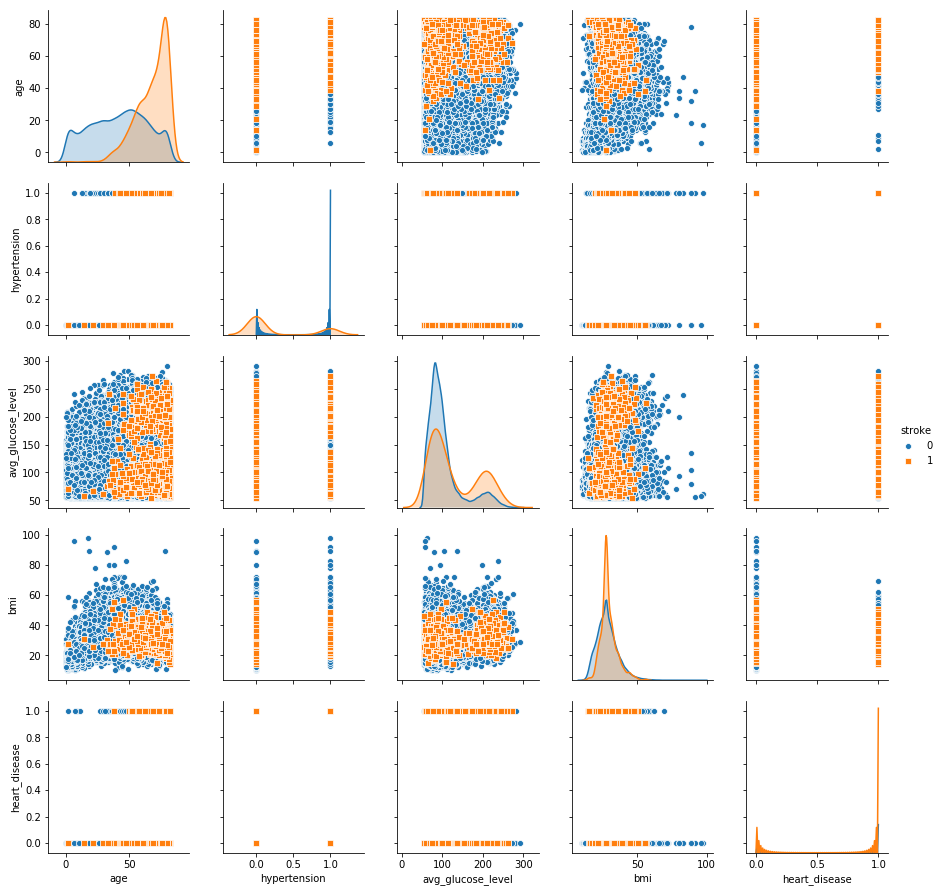

In [17]:
#pair plot for stroke
sns.pairplot(clinical1[['age','hypertension','heart_disease','avg_glucose_level','bmi', 'stroke']], vars=['age','hypertension','avg_glucose_level','bmi','heart_disease'],hue='stroke',dropna=True, markers=["o","s"])

plt.tile='Pair Plot'


In [63]:
#X = clinical1.loc[:,clinical1.columns!='heart_disease']
X = clinical1[clinical1.columns[~clinical1.columns.isin(['heart_disease','id'])]]

X.head()

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0


In [64]:
Y = clinical1.heart_disease
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: heart_disease, dtype: int64

In [81]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train,  Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)
print(X_train.count())
print(Y_train.count())


gender               34720
age                  34720
hypertension         34720
ever_married         34720
work_type            34720
Residence_type       34720
avg_glucose_level    34720
bmi                  34720
smoking_status       34720
stroke               34720
dtype: int64
34720


In [70]:
from sklearn import preprocessing
def encode_colums(train_data):
    le = preprocessing.LabelEncoder()
    for column_name in train_data.columns:
        if train_data[column_name].dtype == object:
            train_data[column_name] = le.fit_transform(train_data[column_name])
        else:
            pass
    return train_data

In [87]:
X_train.head()
X_train = encode_colums(X_train)
X_test = encode_colums(X_test)
X_train.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
12407,1,80.0,0,0,2,0,179.64,28.5,1,0
26973,0,59.0,0,1,0,0,90.05,29.9,1,0
16671,0,66.0,0,1,2,1,75.90,31.9,1,0
42558,1,50.0,0,0,2,0,115.02,36.9,1,0
29659,0,47.0,0,1,0,1,104.90,24.9,1,0


In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
#print('xtrain - ',X_train.count())
#print('xtrain an dy train')
print('Ytrain - ',Y_train.count())
      



Ytrain -  34720


In [88]:
pred_Y = logreg.predict(X_train)
pred_Y_test = logreg.predict(X_test)


In [93]:
# Model evaluation
from sklearn.metrics import accuracy_score
print('Accuracy score of above prediction is ', accuracy_score(Y_test,pred_Y_test))


Accuracy score of above prediction is  0.9497695852534562


A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. 
 Below is a diagram showing a general confusion matrix. image.png


In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, pred_Y_test))
confusion_matrix

,0,1
0,8243,4
1,432,1


In [ ]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

In [ ]:
preds2 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds2))